
# Simple Decision Tree for Regression

## Introduction to Decision Trees
Decision Trees are versatile machine learning algorithms that can perform both classification and regression tasks. They are widely used due to their interpretability, ease of use, and flexibility. In this tutorial, we will focus on using a decision tree for a regression task.



## Building a Basic Tree Structure

To build a decision tree, we first need a basic structure. We'll start by defining a `Node` class, similar to what we've done for binary trees, but with additional functionality to facilitate decision making.


In [2]:

class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        """
        A TreeNode represents a node in the decision tree.
        
        Parameters:
        - feature (int): Index of the feature used for splitting.
        - threshold (float): The value used for splitting.
        - left (TreeNode): Left child of the node.
        - right (TreeNode): Right child of the node.
        - value (float): The value stored in a leaf node. Represents the prediction.
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        """ Check if a node is a leaf node (no children). """
        return self.value is not None



## Implementing the Decision Making Algorithm

A decision tree splits the data based on certain criteria. In the case of regression, we often use the variance reduction as our criterion. We'll implement a function to determine the best split.


In [3]:

import numpy as np

def calculate_variance(y):
    """
    Calculate the variance of a given target variable array.
    
    Parameters:
    - y (array): Target variable array.
    
    Returns:
    - float: The variance of y.
    """
    return np.var(y)

def find_best_split(X, y):
    """
    Find the best split for a node in the decision tree.
    
    Parameters:
    - X (array): Features array.
    - y (array): Target variable array.
    
    Returns:
    - best_feature (int): Index of the feature to split on.
    - best_threshold (float): The threshold value for the split.
    """
    best_feature, best_threshold = None, None
    best_variance_reduction = 0
    n_samples, n_features = X.shape
    
    # Iterate over all features
    for feature_idx in range(n_features):
        thresholds = np.unique(X[:, feature_idx])
        # Iterate over all unique values of the feature
        for threshold in thresholds:
            left_idx = X[:, feature_idx] <= threshold
            right_idx = X[:, feature_idx] > threshold
            
            # Skip if split doesn't divide the dataset
            if sum(left_idx) == 0 or sum(right_idx) == 0:
                continue
            
            # Calculate the variance reduction
            variance_reduction = calculate_variance(y) -                                  (calculate_variance(y[left_idx]) * len(y[left_idx]) +                                   calculate_variance(y[right_idx]) * len(y[right_idx])) / n_samples
            # Update best split if current split is better
            if variance_reduction > best_variance_reduction:
                best_variance_reduction = variance_reduction
                best_feature = feature_idx
                best_threshold = threshold
                
    return best_feature, best_threshold



## Creating a Regression Example

Now, let's create a simple dataset to demonstrate how the decision tree can be used for regression.


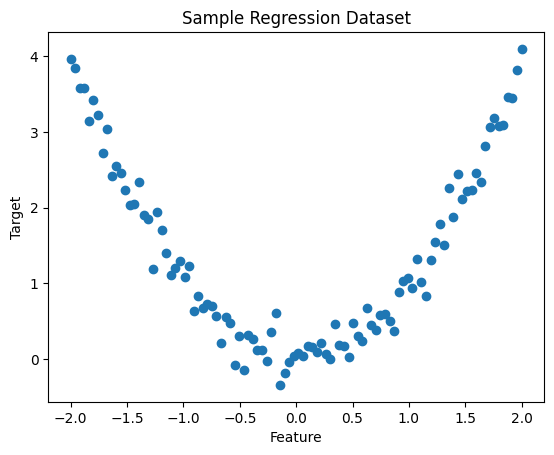

In [26]:

import numpy as np
import matplotlib.pyplot as plt

# Generating a simple dataset
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = X ** 2 + np.random.randn(*X.shape) * 0.2

# Plotting the dataset
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Sample Regression Dataset")
plt.show()



## Testing and Visualization

We will now create and train a simple decision tree on this dataset and visualize the results.


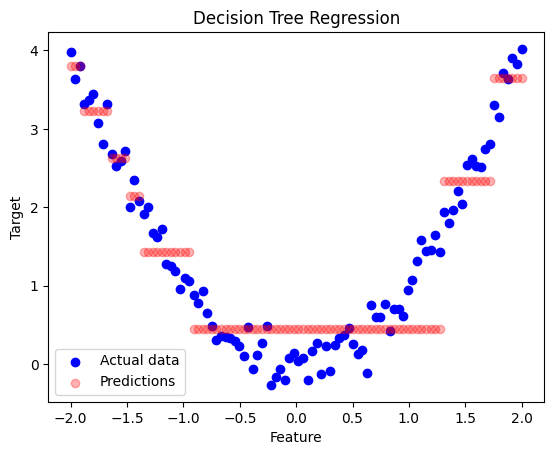

In [5]:
# Code for building and testing the decision tree will go here
class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(np.unique(y)) <= 1:
            leaf_value = np.mean(y)
            return TreeNode(value=leaf_value)

        best_feature, best_threshold = find_best_split(X, y)
        if best_feature is None:
            leaf_value = np.mean(y)
            return TreeNode(value=leaf_value)

        left_idx = X[:, best_feature] <= best_threshold
        right_idx = X[:, best_feature] > best_threshold
        left_subtree = self.fit(X[left_idx], y[left_idx], depth + 1)
        right_subtree = self.fit(X[right_idx], y[right_idx], depth + 1)
        return TreeNode(best_feature, best_threshold, left_subtree, right_subtree)

    def predict(self, X):
        return np.array([self._predict(x, self.root) for x in X])

    def _predict(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict(x, node.left)
        return self._predict(x, node.right)

# Training the decision tree
regressor = DecisionTreeRegressor(max_depth=3)
regressor.root = regressor.fit(X, y)

# Making predictions
predictions = regressor.predict(X)

# Visualization
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, predictions, color='red', label='Predictions', alpha=0.3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



## Conclusion and Further Steps

In this tutorial, we've seen how to build a simple decision tree for a regression task. For further exploration, consider enhancing the tree with more features like tree pruning, handling different types of data, and implementing more sophisticated splitting criteria.


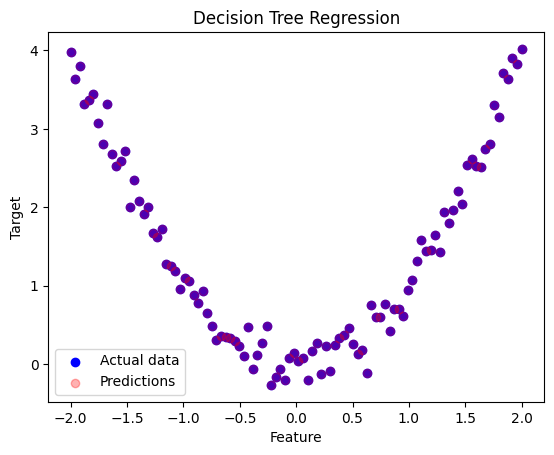

In [8]:
# Training the decision tree
regressor = DecisionTreeRegressor(max_depth=20)
regressor.root = regressor.fit(X, y)

# Making predictions
predictions = regressor.predict(X)

# Visualization
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, predictions, color='red', label='Predictions', alpha=0.3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

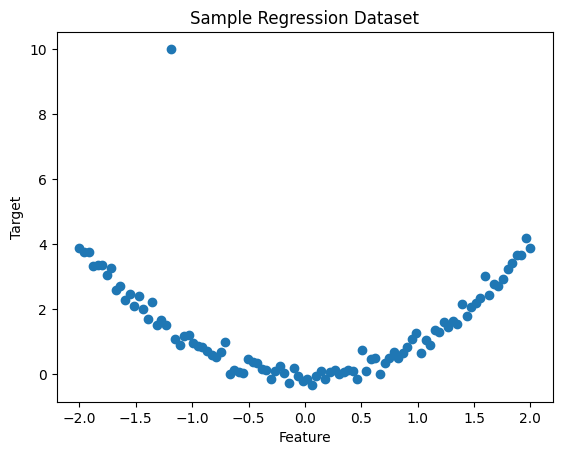

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a simple dataset
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = X ** 2 + np.random.randn(*X.shape) * 0.2
y[20] = 10

# Plotting the dataset
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Sample Regression Dataset")
plt.show()


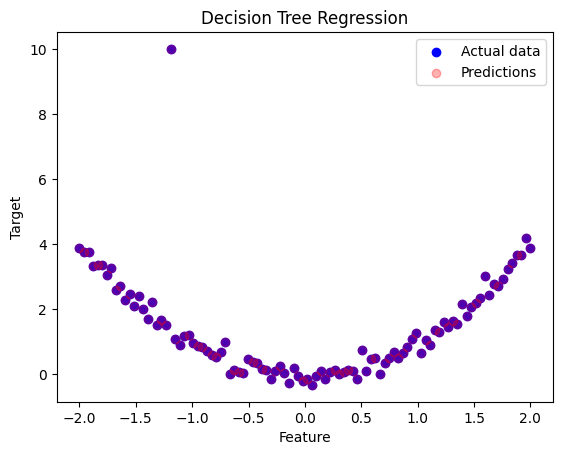

In [12]:
# Training the decision tree
regressor = DecisionTreeRegressor(max_depth=20)
regressor.root = regressor.fit(X, y)

# Making predictions
predictions = regressor.predict(X)

# Visualization
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, predictions, color='red', label='Predictions', alpha=0.3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

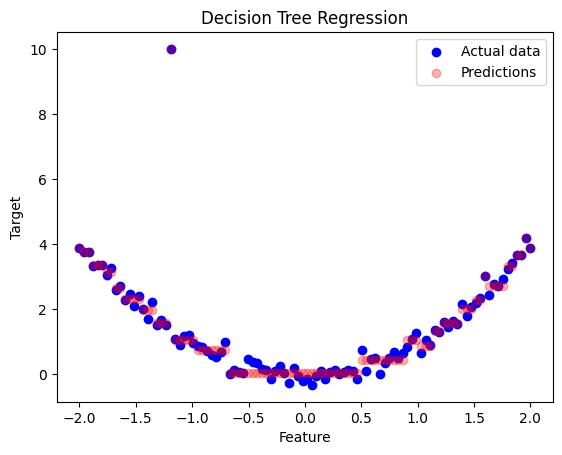

In [13]:
# Training the decision tree
regressor = DecisionTreeRegressor(max_depth=5)
regressor.root = regressor.fit(X, y)

# Making predictions
predictions = regressor.predict(X)

# Visualization
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, predictions, color='red', label='Predictions', alpha=0.3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

[Text(0.5, 0.875, '[-2.] <= -1.374\nsquared_error = 1.455\nsamples = 100\nvalue = 1.366'),
 Text(0.25, 0.625, '[-2.] <= -1.737\nsquared_error = 0.389\nsamples = 16\nvalue = 2.911'),
 Text(0.125, 0.375, '[-2.] <= -1.859\nsquared_error = 0.079\nsamples = 7\nvalue = 3.535'),
 Text(0.0625, 0.125, 'squared_error = 0.028\nsamples = 4\nvalue = 3.743'),
 Text(0.1875, 0.125, 'squared_error = 0.014\nsamples = 3\nvalue = 3.259'),
 Text(0.375, 0.375, '[-2.] <= -1.657\nsquared_error = 0.091\nsamples = 9\nvalue = 2.425'),
 Text(0.3125, 0.125, 'squared_error = 0.024\nsamples = 2\nvalue = 2.879'),
 Text(0.4375, 0.125, 'squared_error = 0.034\nsamples = 7\nvalue = 2.296'),
 Text(0.75, 0.625, '[-2.] <= 1.333\nsquared_error = 1.117\nsamples = 84\nvalue = 1.072'),
 Text(0.625, 0.375, '[-2.] <= -0.929\nsquared_error = 0.324\nsamples = 67\nvalue = 0.628'),
 Text(0.5625, 0.125, 'squared_error = 0.103\nsamples = 11\nvalue = 1.446'),
 Text(0.6875, 0.125, 'squared_error = 0.21\nsamples = 56\nvalue = 0.467'),
 Te

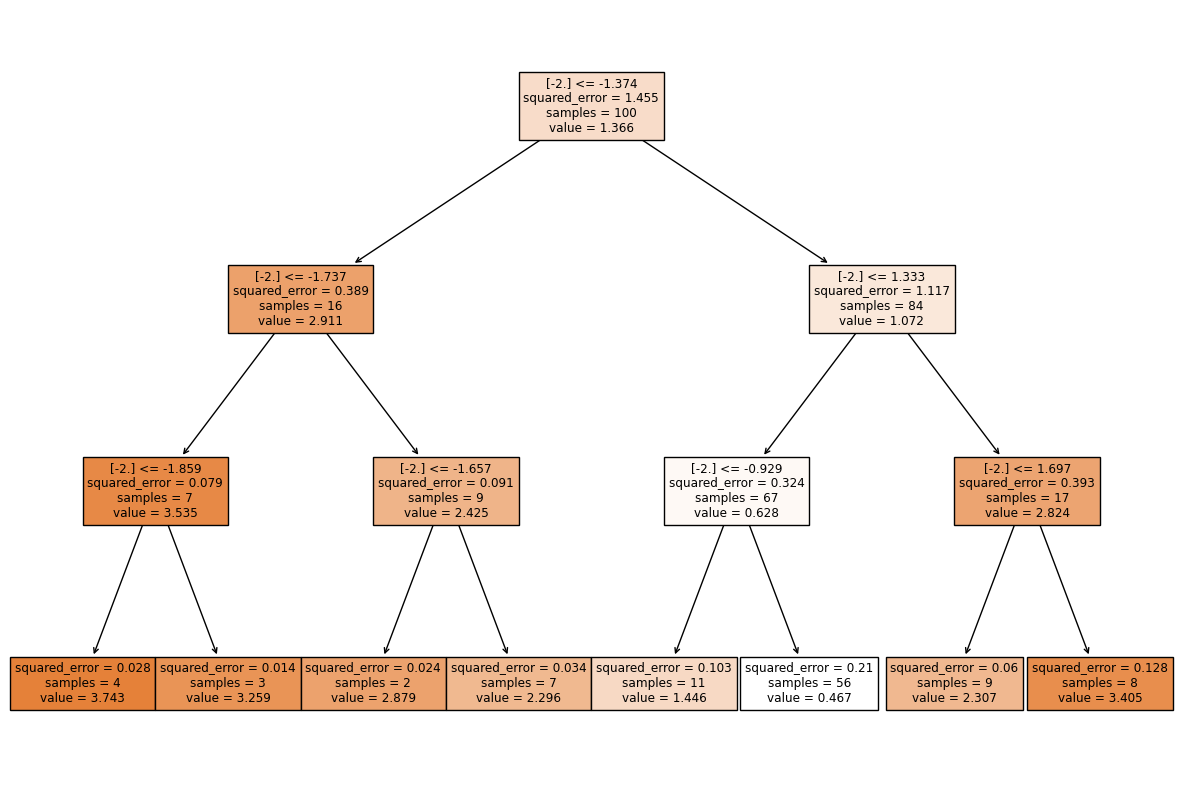

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np



# Fit a decision tree classifier
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(X, y)
predictions = clf.predict(X)

# Create the tree plot
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X, class_names=y, ax=ax)


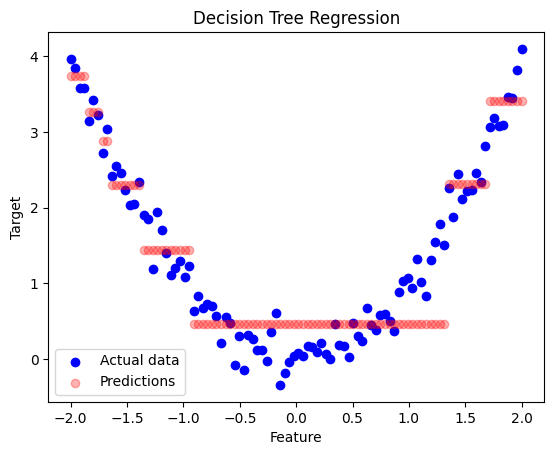

In [29]:
# Visualization
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X,predictions, color='red', label='Predictions', alpha=0.3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()